## Part 3: Communities for the Zachary Karate Club Network

_Exercise: Zachary's karate club_: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html).

> 1. Visualize the graph using [netwulf](https://netwulf.readthedocs.io/en/latest/). Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/karate.png" alt="Drawing" style="width: 200px;"/>

In [ ]:
import networkx as nx
from networkx.algorithms import community
import community as community_louvain
import math
import netwulf as nw
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
#nx.info(G0)
G0= nw.get_filtered_network(G,node_group_key='club')
nw.visualize(G0)

> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.
$$ M = \sum\limits_{c = 1}^{n_c } {\left[ {\frac{{L_c }}{L} - \left( {\frac{{k_c }}{{2L}}} \right)^2 } \right]}  \hspace{20 mm} (9 . 12) $$

In [ ]:
def Mod(G,C):
    count=list(set([i for i in C.values()]))
    #print(count) #社区名
    #print(len(count)) #社区数量

    n_c=len(count)
    L=G.number_of_edges()
    M=0

    for c in range(0,n_c):
        sub=[]
        L_c=0
        k_c=0
        #i=0
        for n in G.nodes:
            if G.nodes[n]["group"]==c:
                #i+=1
                k_c+=G.degree(n)
                sub.append(n)    
        L_c=G.subgraph(sub).number_of_edges()
        #print(L_c)
        #print(k_c)
        #print('number of nodes:',i)
        M+=(L_c/L)-pow((k_c/(2*L)),2)

    return M

> 3. Explain in your own words the concept of _modularity_. 

<font color=blue>
    Modularity can be used to determine how good the community segmentation results are. The larger the modularity, the better the community classification, and the best clustering result is when the result is between 0.3 and 0.7.
</font>

> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.


In [ ]:
club = nx.get_node_attributes(G,'club')
#print(club)
Q=Mod(G0,club)
print(Q)

> 5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from $0$. To do so, we will implement a [configuration model](https://en.wikipedia.org/wiki/Configuration_model). In short, we will create a new network, such that each node has the same degree as in the original network, but different connections. Here is how the algorithm works.
>       * __a.__ Create an identical copy of your original network. 
>       * __b.__ Consider the list of network edges. Create two lists: the list of source nodes and target nodes. (e.g. edges = [(1,2),(3,4)], sources = [1,3], targets = [2,4])
>       * __c.__ Concatenate the list of source nodes and target nodes into a unique list (e.g. [1,3,2,4]). This is the list of _stubs_ (see the [Wikipedia page](https://en.wikipedia.org/wiki/Configuration_model) for the definition of stub).
>       * __d.__ Shuffle the list of stubs. Build a set of edges (tuples), by connecting each element in the list of shuffled stubs with the following element. (e.g. [4,1,2,3] --> [(4,1),(2,3)])
>       * __e.__ Remove all the original network edges from your network. Add all the new _shuffled_ edges you created in step __d.__


In [ ]:
sequence=[]
for n in G.nodes:
    sequence.append(G.degree(n))
#print(sequence)

G_CM = nx.configuration_model(sequence)
#print(nx.info(G_CM))
#print(nx.info(G))

pos = nx.circular_layout(G_CM)

nx.draw_networkx(G_CM,pos)
plt.title("Zachary's Karate Club: Configuration Model")

plt.show()

nx.draw_networkx(G,pos)
plt.title("Zachary's Karate Club: Original Model")
plt.show()


> 6. Is the degree of the nodes in your original and the configuration model network the same? Why? 

__Note 1:__ With this algorithm you may obtain some self-loops. Note that [a self-loop should add two to the degree](https://en.wikipedia.org/wiki/Loop_(graph_theory%29#:~:text=For%20an%20undirected%20graph%2C%20the,adds%20two%20to%20the%20degree.&text=In%20other%20words%2C%20a%20vertex,not%20one%2C%20to%20the%20degree.). 

__Note 2:__ With this algorithm, you could also obtain repeated edges between the same two nodes. Only NetworkX [MultiGraph](https://networkx.org/documentation/stable/reference/classes/multigraph.html) allow for repeated edges, while regular [Graph](https://networkx.org/documentation/stable/reference/classes/graph.html?highlight=graph%20undirected#networkx.Graph) do not, meaning you will not be able to account for multi-edges when you have a regular Graph. (_Optional_: if you want to implement a configuration model without self-loops and multi-edges, you can try out the [double_edge_swap](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html) algorithm)


In [ ]:
DG1=[]
DG2=[]

for n in G.nodes:
    DG1.append(G.degree(n))
for n in G_2.nodes:
    DG2.append(G_2.degree(n))

if DG1 == DG2:
    print('YES')
else:
    print('NO')
        
print('Degree of nodes of Graph 1:',DG1)
print('Degree of nodes of Graph 2:',DG2)

<font color=blue> Because the configuration model is a method for generating random networks from a given degree sequence.

> 7. Create $1000$ randomized version of the Karate Club network using the algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.


In [141]:
clublist=[]
sum=0
for n in range(0,1000):
    #print(n)
    G_N = nx.configuration_model(sequence)
    #C_N = community_louvain.best_partition(G_N) #使用Louvain算法进行分区
    nx.set_node_attributes(G_N, club, 'club')#设置节点属性
    G_N = nw.get_filtered_network(G_N,node_group_key='club')
    M_N=Mod(G_N,club)
    clublist.append(M_N)
    sum+=M_N
print(clublist)

[0.024901380670611373, 0.050542406311637006, 0.024901380670611373, 0.050542406311637006, -0.02638067061143992, -0.052021696252465555, 0.024901380670611373, -0.0007396449704142605, 0.024901380670611373, -0.02638067061143992, 0.024901380670611373, 0.07618343195266267, -0.0007396449704142605, -0.052021696252465555, -0.0007396449704142605, 0.024901380670611373, 0.07618343195266267, -0.052021696252465555, -0.0007396449704142605, 0.024901380670611373, 0.10182445759368833, -0.0007396449704142605, -0.0007396449704142605, -0.10330374753451682, 0.050542406311637006, -0.052021696252465555, -0.07766272189349116, 0.050542406311637006, -0.02638067061143992, 0.050542406311637006, 0.07618343195266267, -0.0007396449704142605, -0.0007396449704142605, 0.024901380670611373, 0.024901380670611373, -0.0007396449704142605, 0.050542406311637006, -0.052021696252465555, 0.07618343195266267, 0.024901380670611373, 0.050542406311637006, -0.02638067061143992, -0.052021696252465555, 0.024901380670611373, 0.0505424063

> 8. Compute the average and standard deviation of the modularity for the configuration model.


In [142]:
ave=sum/1000
print(ave)

0.0014142011834318924


> 9. Plot the distribution of the configuration model modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)). 


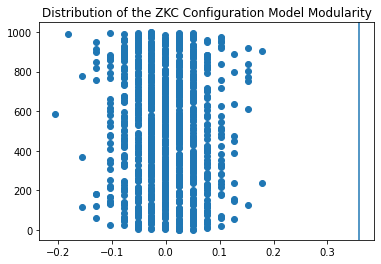

In [143]:
y=[]
for n in range(0,1000):
    y.append(n)
    
plt.scatter(clublist,y)
plt.axvline(Q)

plt.title("Distribution of the ZKC Configuration Model Modularity")
plt.show()

> 10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to compare with the configuration model? What is the reason why we preserved the nodes degree?


+ <font color=blue>It's a very good partitioning.</font>
+ <font color=blue>Because it can be clearly seen the difference of modularity between the community network and random network.</font>
+ <font color=blue></font><font color=blue>Ensure that modular differences are not influenced by node degrees, but by links - and different links make communities</font>

> 11.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

({'xlim': [0, 813],
  'ylim': [0, 813],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 2.2130879338008085,
  'links': [{'source': 0,
    'target': 1,
    'width': 4.426175867601617,
    'weight': 1},
   {'source': 0, 'target': 2, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 3, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 4, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 5, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 6, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 7, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 8, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 10, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 11, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target': 12, 'width': 4.426175867601617, 'weight': 1},
   {'source': 0, 'target'

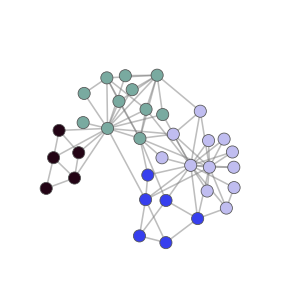

In [144]:
C = community_louvain.best_partition(G) #使用Louvain算法进行分区
nx.set_node_attributes(G, C, 'louvain')#设置节点属性
G_louvain = nw.get_filtered_network(G,node_group_key='louvain')

nw.visualize(G_louvain)

In [147]:
print('Modularity of Greedy-algorithm Grapy:',Q)
MLV=community_louvain.modularity(C, G_louvain)
print('Modularity of Louvain-algorithm Grapy:',MLV)

Modularity of Greedy-algorithm Grapy: 0.3582347140039447
Modularity of Louvain-algorithm Grapy: 0.41978961209730437


<font color=blue>Higher.</font>
+ <font color=blue>Different modularity values for different algorithmic partitions.</font>
+ <font color=blue>Better partitions have higher modularity values.</font>

> 12.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [135]:
n = 2
m = 3
D = [None]*n
for i in range(len(D)):
    D[i] = [0]*m
print(D)

[[0, 0, 0], [0, 0, 0]]


_Exercise: Community detection on the GME network._
> * Consider the GME network you built in [Week 4](https://github.com/lalessan/comsocsci2022/blob/main/lectures/Week4.ipynb), part 2.
> * Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0? 
> * Visualize the network, using netwulf (see Week 4). This time assign each node a different color based on their _community_. Describe the structure you observe.